# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

### 1. Importing libraries and data
### 2. Subsetting, wrangling, and cleaning time-series data
### 3. Time series analysis: decomposition
### 4. Testing for stationarity
### 5. Stationarizing Data

# 1. Importing libraries and data

In [31]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [32]:
path = "C:/Users/kevan/Documents/Career Foundry/Data Immersion/Achievement 6/Final Project"

In [33]:
# importing original dataframe to get month and year in same column

df = pd.read_csv(r'C:\Users\kevan\Documents\Career Foundry\Data Immersion\Achievement 6\Final Project\Data\Original Data\SNAP_Policy_Database.csv', index_col = False)

In [34]:
# open the os library, find function that joins paths
# this creates one folder path to your specific file

df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'SNAP_Policy_Database.csv'), index_col = False)

In [35]:
# setting max columns to see all in df

pd.set_option('display.max_columns', 50)

In [36]:
# setting max rows to see all in df

pd.set_option('display.max_rows', 160)

# 2. Subsetting, wrangling, and (re)cleaning time-series data

In [37]:
# drop columns state_pc and state_fips because data is not relevant

df_clean = df.drop(columns = ['state_pc', 'state_fips'])

In [38]:
# changing data types

df_clean = df_clean.astype({'yearmonth': 'string', 'bbce' : 'bool', 'bbce_asset' : 'object', 'bbce_a_veh' : 'object', 'bbce_hh' : 'object', 'bbce_sen' : 'object', 'call' : 'object', 'cap' : 'object', 'fingerprint' : 'object', 'noncitadultfull' : 'object', 'noncitadultpart' : 'object', 'noncitchildfull' : 'object', 'noncitchildpart' : 'object', 'nonciteldfull' : 'object', 'nonciteldpart' : 'object', 'oapp' : 'object', 'reportsimple' : 'object', 'transben' : 'object', 'vehexclall' : 'object', 'vehexclamt' : 'object', 'vehexclone' : 'object'})

In [39]:
# creating dictionary to make column names more intuitive

dict = {'statename' : 'State_Name',
       'yearmonth' : 'Year_Month',
       'bbce_inclmt' : 'bbce_inclmt_%',
       'bbce_asset' : 'bbce_assetlmt_eliminated',
       'bbce_a_amt' : 'bbce_assetlmt_1kdollars',
       'bbce_a_veh' : 'bbce_vehicle',
       'bbce_hh' : 'bbce_household',
       'bbce_sen' : 'bbce_senior_disabled',
       'call' : 'call_center',
       'cap' : 'CAP_for_SSI',
       'certearn0103' : '1to3mo_recert_%SNAP',
       'certearn0406' : '4to6mo_recert_%SNAP',
       'certearn0712' : '7to12mo_recert_%SNAP',
        'certearn1399' : '13mo_plus_recert_%SNAP',
        'certearnavg' : 'Average_Months_Certification',
       'certearnmed' : 'Median_Months_Certification',
       'certeld0103' : '%_elderly_1to3mo_recert',
       'certeld0406' : '%_elderly_4to6mo_recert',
       'certeld0712' : '%_elderly_7to12mo_recert',
       'certeld1399' : '%_elderly_13moplus_recert',
       'certeldavg' : 'Average_Months_Elderly',
        'certeldmed' : 'Median_Months_Elderly',
       'certnonearn0103' : '%nonearn_1to3mo_recert',
       'certnonearn0406' : '%nonearn_4to6mo_recert',
       'certnonearn0712' : '%nonearn_7to12mo_recert',
       'certnonearn1399' : '%nonearn_13moplus_recert',
       'certnonearnavg' : 'Average_Months_Nonearning',
       'certnonearnmed' : 'Median_Months_Nonearning',
       'ebtissuance' : '%_dollar_EBT',
       'faceini' : 'Int_Face_Interview_Waiver',
       'facerec' : 'Recert_Face_Interview_Waiver',
       'noncitadultfull' : 'All_Elig_Noncitizen_Adult',
       'noncitadultpart' : 'Some_Elig_Noncitizen_Adult',
       'noncitchildfull' : 'All_Elig_Noncitizen_Child',
       'noncitchildpart' : 'Some_Elig_Noncitizen_Child',
       'nonciteldfull' : 'All_Elig_Noncitizen_Elderly',
       'nonciteldpart' : 'Some_Elig_Noncitizen_Elderly',
       'oapp' : 'Online_Application',
       'outreach' : 'Outreach_Spending_1kdollars',
       'reportsimple' : 'Simple_Reporting_Option',
       'transben' : 'Transitional_Benefits',
       'vehexclall' : 'Exclude_All_Vehicles',
       'vehexclamt' : 'High_Vehicle_Exemption',
       'vehexclone' : 'Exclude_OnePlus_Vehicles'}

In [40]:
# renaming columns and saving to df_clean

df_clean.rename(columns=dict, inplace=True)

In [41]:
# adding hyphen to separate year and month

df_clean['Year_Month'] = df_clean['Year_Month'].str.replace(r'(\w{4})',r'\1-',regex=True).str.strip('\-')

In [42]:
# verify that columns and values are successfully changed

df_clean.tail()

,State_Name,Year_Month,bbce,bbce_inclmt_%,bbce_assetlmt_eliminated,bbce_assetlmt_1kdollars,bbce_vehicle,bbce_household,bbce_senior_disabled,call_center,CAP_for_SSI,1to3mo_recert_%SNAP,4to6mo_recert_%SNAP,7to12mo_recert_%SNAP,13mo_plus_recert_%SNAP,Average_Months_Certification,Median_Months_Certification,%_elderly_1to3mo_recert,%_elderly_4to6mo_recert,%_elderly_7to12mo_recert,%_elderly_13moplus_recert,Average_Months_Elderly,Median_Months_Elderly,%nonearn_1to3mo_recert,%nonearn_4to6mo_recert,%nonearn_7to12mo_recert,%nonearn_13moplus_recert,Average_Months_Nonearning,Median_Months_Nonearning,%_dollar_EBT,Int_Face_Interview_Waiver,Recert_Face_Interview_Waiver,fingerprint,All_Elig_Noncitizen_Adult,Some_Elig_Noncitizen_Adult,All_Elig_Noncitizen_Child,Some_Elig_Noncitizen_Child,All_Elig_Noncitizen_Elderly,Some_Elig_Noncitizen_Elderly,Online_Application,Outreach_Spending_1kdollars,Simple_Reporting_Option,Transitional_Benefits,Exclude_All_Vehicles,High_Vehicle_Exemption,Exclude_OnePlus_Vehicles
12847,Wyoming,2016-08,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.024384,0.969332,0.0,0.006284,5.21908,5.333333,0.0,0.078019,0.152927,0.769053,20.689518,22.0,0.044668,0.638128,0.065153,0.252051,9.666319,8.000000,1.0,1,1,0,0.0,1.0,1,0,0.0,1.0,0,0.0,1.0,0.0,NaN,NaN,NaN
12848,Wyoming,2016-09,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.024384,0.969332,0.0,0.006284,5.25107,5.500000,0.0,0.078019,0.237042,0.684939,19.680149,20.0,0.044668,0.667347,0.062192,0.225794,9.137205,7.666667,1.0,1,1,0,NaN,NaN,1,0,NaN,NaN,0,0.0,1.0,0.0,NaN,NaN,NaN
12849,Wyoming,2016-10,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,1,0,NaN,NaN,1,0,NaN,NaN,0,NaN,1.0,0.0,NaN,NaN,NaN
12850,Wyoming,2016-11,False,-9,-9,-9.0,-9,-9,-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,1,0,NaN,NaN,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
12851,Wyoming,2016-12,False,-9,-9,-9.0,-9,-9,-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,1,0,NaN,NaN,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_clean.shape

(12852, 46)

#### Creating a subset for Oregon because this state had 100% SNAP participation in 2011, 2013 & 2016.
#### One state at a time because time series analysis requires one continous line.

In [44]:
df_OR = df_clean[df_clean['State_Name'] == 'Oregon']
df_OR

,State_Name,Year_Month,bbce,bbce_inclmt_%,bbce_assetlmt_eliminated,bbce_assetlmt_1kdollars,bbce_vehicle,bbce_household,bbce_senior_disabled,call_center,CAP_for_SSI,1to3mo_recert_%SNAP,4to6mo_recert_%SNAP,7to12mo_recert_%SNAP,13mo_plus_recert_%SNAP,Average_Months_Certification,Median_Months_Certification,%_elderly_1to3mo_recert,%_elderly_4to6mo_recert,%_elderly_7to12mo_recert,%_elderly_13moplus_recert,Average_Months_Elderly,Median_Months_Elderly,%nonearn_1to3mo_recert,%nonearn_4to6mo_recert,%nonearn_7to12mo_recert,%nonearn_13moplus_recert,Average_Months_Nonearning,Median_Months_Nonearning,%_dollar_EBT,Int_Face_Interview_Waiver,Recert_Face_Interview_Waiver,fingerprint,All_Elig_Noncitizen_Adult,Some_Elig_Noncitizen_Adult,All_Elig_Noncitizen_Child,Some_Elig_Noncitizen_Child,All_Elig_Noncitizen_Elderly,Some_Elig_Noncitizen_Elderly,Online_Application,Outreach_Spending_1kdollars,Simple_Reporting_Option,Transitional_Benefits,Exclude_All_Vehicles,High_Vehicle_Exemption,Exclude_OnePlus_Vehicles
9324,Oregon,1996-01,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.014140,0.078804,0.907056,0.0,10.529799,12.0,0.0,0.0,1.000000,0.000000,11.750000,12.0,0.014501,0.198189,0.787310,0.000000,9.329751,10.250000,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.00000,0.0,0.0,0.0,0.0,0.0
9325,Oregon,1996-02,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.005952,0.082520,0.911527,0.0,10.586497,12.0,0.0,0.0,1.000000,0.000000,11.750000,12.0,0.019263,0.197795,0.782942,0.000000,9.368446,10.250000,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.00000,0.0,0.0,0.0,0.0,0.0
9326,Oregon,1996-03,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.024471,0.048349,0.927180,0.0,10.663091,12.0,0.0,0.0,1.000000,0.000000,11.750000,12.0,0.014989,0.175478,0.809533,0.000000,9.552715,11.083333,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.00000,0.0,0.0,0.0,0.0,0.0
9327,Oregon,1996-04,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.024471,0.080773,0.894756,0.0,10.639454,12.0,0.0,0.0,1.000000,0.000000,11.833333,12.0,0.014989,0.184484,0.800527,0.000000,9.568346,11.083333,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.00000,0.0,0.0,0.0,0.0,0.0
9328,Oregon,1996-05,False,-9,-9,-9.0,-9,-9,-9,0.0,0.0,0.024471,0.081609,0.893920,0.0,10.619666,12.0,0.0,0.0,1.000000,0.000000,11.783333,12.0,0.022926,0.167740,0.809335,0.000000,9.505919,11.083333,0.0,0,0,0,1.0,0.0,1,0,1.0,0.0,0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,Oregon,2016-08,True,185,1,-9.0,-9,0,0,2.0,0.0,0.000000,0.006384,0.993616,0.0,11.948932,12.0,0.0,0.0,0.991549,0.008451,12.101416,12.0,0.004600,0.000000,0.987498,0.007901,12.024320,12.000000,1.0,1,1,0,0.0,1.0,1,0,0.0,1.0,1,57.95108,1.0,1.0,NaN,NaN,NaN
9572,Oregon,2016-09,True,185,1,-9.0,-9,0,0,2.0,0.0,0.000000,0.006384,0.993616,0.0,11.948932,12.0,0.0,0.0,0.971355,0.028645,12.343737,12.0,0.004600,0.000000,0.986053,0.009346,12.066152,12.000000,1.0,1,1,0,NaN,NaN,1,0,NaN,NaN,1,57.95108,1.0,1.0,NaN,NaN,NaN
9573,Oregon,2016-10,True,185,1,-9.0,-9,0,0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,1,0,NaN,NaN,1,0,NaN,NaN,1,NaN,1.0,1.0,NaN,NaN,NaN
9574,Oregon,2016-11,True,185,1,-9.0,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,1,0,NaN,NaN,1,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_OR.shape

(252, 46)

In [46]:
# creating another subset of the OR data but only using Year_Month and Average_Months_Nonearning variables

df_ts = df_OR[['Year_Month', 'Average_Months_Nonearning']]
df_ts

,Year_Month,Average_Months_Nonearning
9324,1996-01,9.329751
9325,1996-02,9.368446
9326,1996-03,9.552715
9327,1996-04,9.568346
9328,1996-05,9.505919
...,...,...
9571,2016-08,12.024320
9572,2016-09,12.066152
9573,2016-10,NaN
9574,2016-11,NaN


#### Resetting index to "YearMonth"

In [47]:
# day value in datatime is default to datetime function. does not represent actual day

from datetime import datetime

df_ts['YearMonth'] = pd.to_datetime(df_ts['Year_Month']) # Create a datetime column from "Date.""
df_ts = df_ts.set_index('YearMonth') # Set the datetime as the index of the dataframe.
df_ts.drop(['Year_Month'], axis=1, inplace=True) # Drop the "Date" column.
df_ts

,Average_Months_Nonearning
YearMonth,
1996-01-01,9.329751
1996-02-01,9.368446
1996-03-01,9.552715
1996-04-01,9.568346
1996-05-01,9.505919
...,...
2016-08-01,12.024320
2016-09-01,12.066152
2016-10-01,NaN


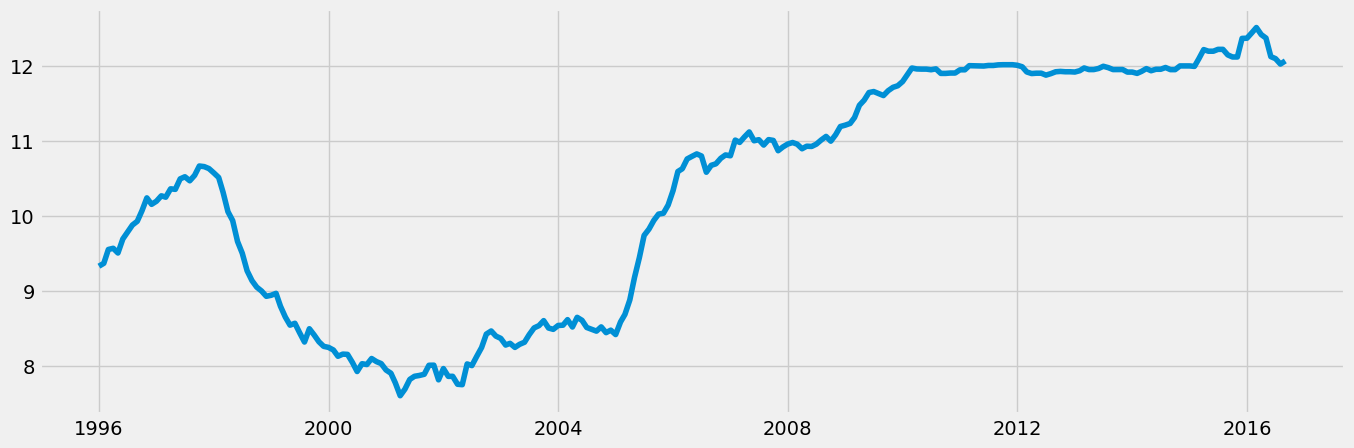

In [48]:
# line chart of average months of recertification in OR

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_ts)
plt.show()

### Data has an upward trend.

In [49]:
# Check for missing values

df_ts.isnull().sum() 

Average_Months_Nonearning    3
dtype: int64

In [50]:
# remove missing values
# these represent time points where data was not available

df_ts.dropna(inplace=True)

In [51]:
df_ts.isnull().sum() 

Average_Months_Nonearning    0
dtype: int64

In [52]:
# Check for duplicates
# dups represent same percentages for different time points. No duplicates removed.

dups = df_ts.duplicated()
dups.sum()

20

#### Smoothing data: Simple moving average

In [53]:
# defining new dataframe for simple moving average values

df_ts2 = df_ts['Average_Months_Nonearning'].to_frame()
df_ts2

,Average_Months_Nonearning
YearMonth,
1996-01-01,9.329751
1996-02-01,9.368446
1996-03-01,9.552715
1996-04-01,9.568346
1996-05-01,9.505919
...,...
2016-05-01,12.370932
2016-06-01,12.123218
2016-07-01,12.096195


In [54]:
# smallest unit of time is MONTHS, so each instance in moving average is one month
# creating a new column for the simple moving average for every 3 months

df_ts2['SMA3'] = df_ts2['Average_Months_Nonearning'].rolling(3).mean()

In [55]:
df_ts2.isnull().sum()

Average_Months_Nonearning    0
SMA3                         2
dtype: int64

In [57]:
df_ts2.head()

,Average_Months_Nonearning,SMA3
YearMonth,,
1996-01-01,9.329751,NaN
1996-02-01,9.368446,NaN
1996-03-01,9.552715,9.416971
1996-04-01,9.568346,9.496503
1996-05-01,9.505919,9.542327


In [58]:
# removing null values. these SMA3 values are null because these are the first 3 data points. SMA3 is calculated by
# taking the average of the previous 3 months.

df_ts2.dropna(inplace=True)
df_ts2

,Average_Months_Nonearning,SMA3
YearMonth,,
1996-03-01,9.552715,9.416971
1996-04-01,9.568346,9.496503
1996-05-01,9.505919,9.542327
1996-06-01,9.692542,9.588936
1996-07-01,9.783000,9.660487
...,...,...
2016-05-01,12.370932,12.432960
2016-06-01,12.123218,12.303695
2016-07-01,12.096195,12.196781


# 3. Time-series analysis: decomposition

In [59]:
# removing column because decomposition function is measuring trend of one variable over time.
# using SMA3 data for decomposition

df_ts3 = df_ts2.drop(['Average_Months_Nonearning'], axis=1)
df_ts3

,SMA3
YearMonth,
1996-03-01,9.416971
1996-04-01,9.496503
1996-05-01,9.542327
1996-06-01,9.588936
1996-07-01,9.660487
...,...
2016-05-01,12.432960
2016-06-01,12.303695
2016-07-01,12.196781


In [60]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_ts3, model='additive')

In [61]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

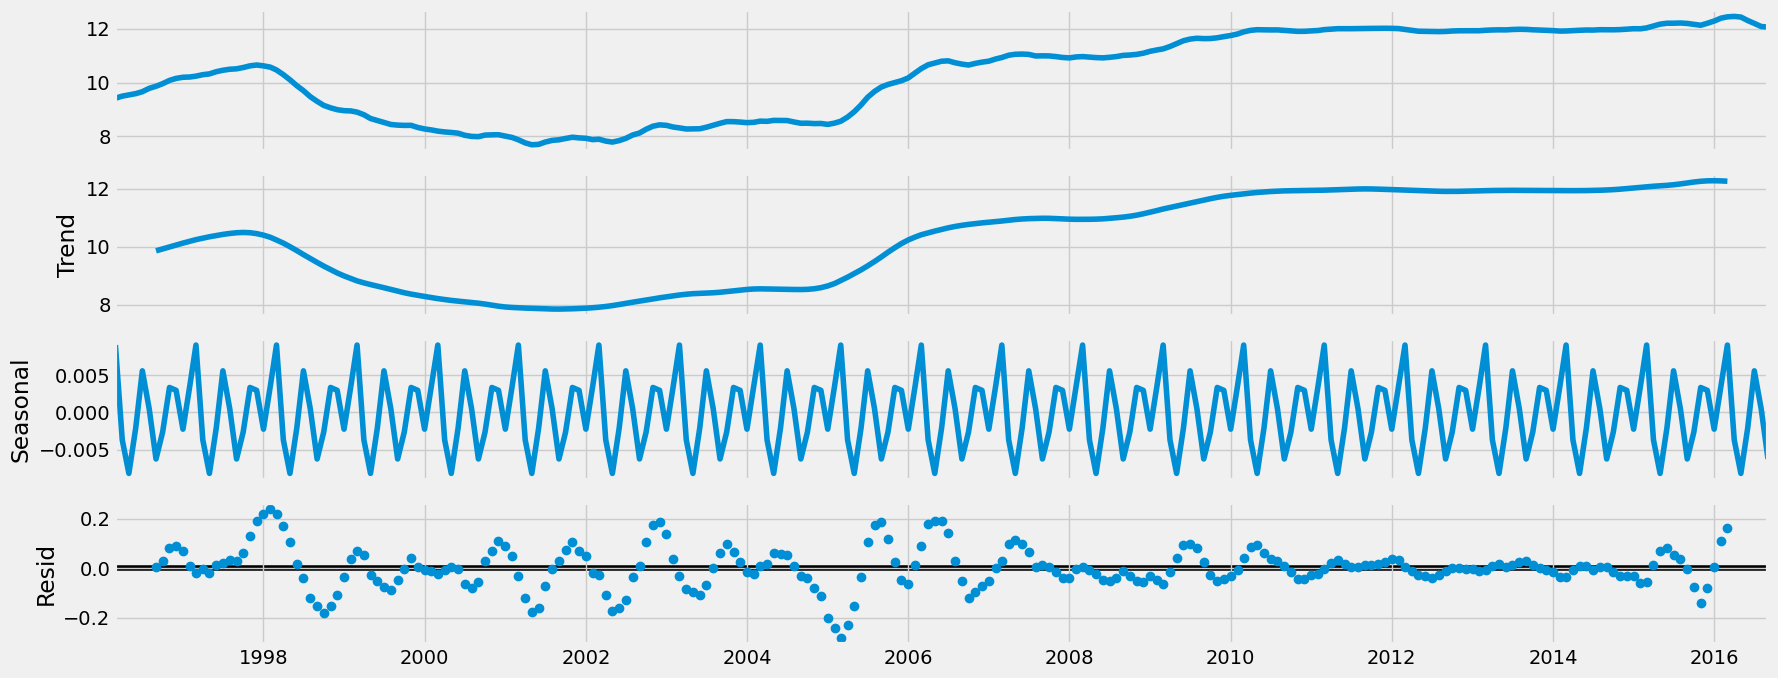

In [62]:
# Plot the separate components

decomposition.plot()
plt.show()

### There is still unexplained noise present in the data after data smoothing. 

# 4. Testing for stationarity

In [64]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_ts3['SMA3'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.564414
p-value                          0.878822
Number of Lags Used             15.000000
Number of Observations Used    231.000000
Critical Value (1%)             -3.458980
Critical Value (5%)             -2.874135
Critical Value (10%)            -2.573482
dtype: float64


### Data is not stationary because p value is >0.05. Perform differencing on data.

# 5. Stationarizing Data

In [65]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff = df_ts3 - df_ts3.shift(1) 

In [66]:
# Remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

data_diff.dropna(inplace = True) 

In [67]:
data_diff.head()

,SMA3
YearMonth,
1996-04-01,0.079532
1996-05-01,0.045824
1996-06-01,0.046609
1996-07-01,0.071551
1996-08-01,0.124106


In [68]:
data_diff.shape

(246, 1)

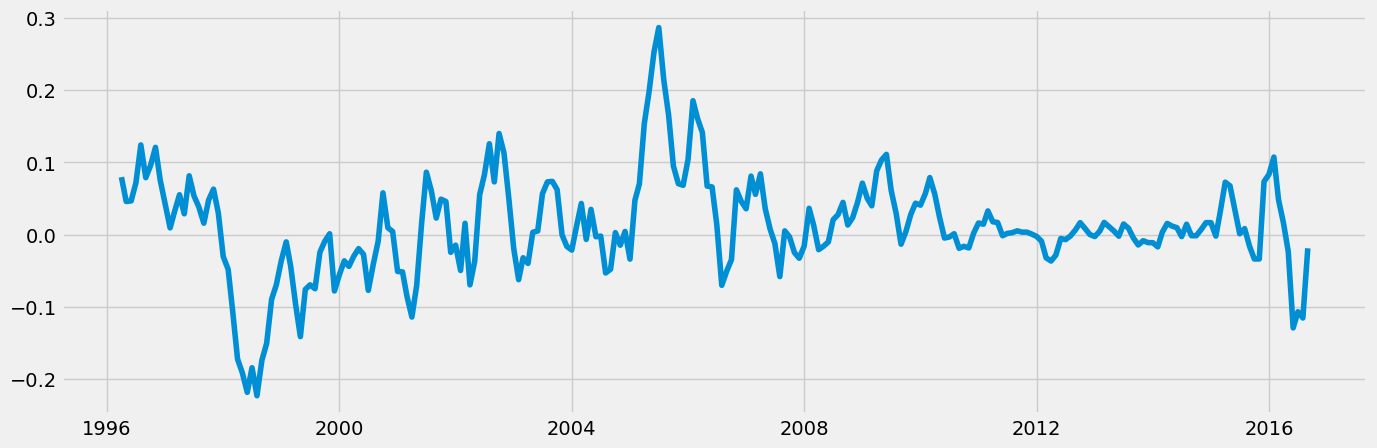

In [69]:
# Time-series curve after differencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)
plt.show()

In [70]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.587097
p-value                          0.006013
Number of Lags Used             14.000000
Number of Observations Used    231.000000
Critical Value (1%)             -3.458980
Critical Value (5%)             -2.874135
Critical Value (10%)            -2.573482
dtype: float64


### P value is <0.05, so results are significant. Test statistic is also smaller than critical values. Data should be stationary.

In [71]:
# Decompose the time series using an additive model

decomposition_2 = sm.tsa.seasonal_decompose(data_diff, model='additive')

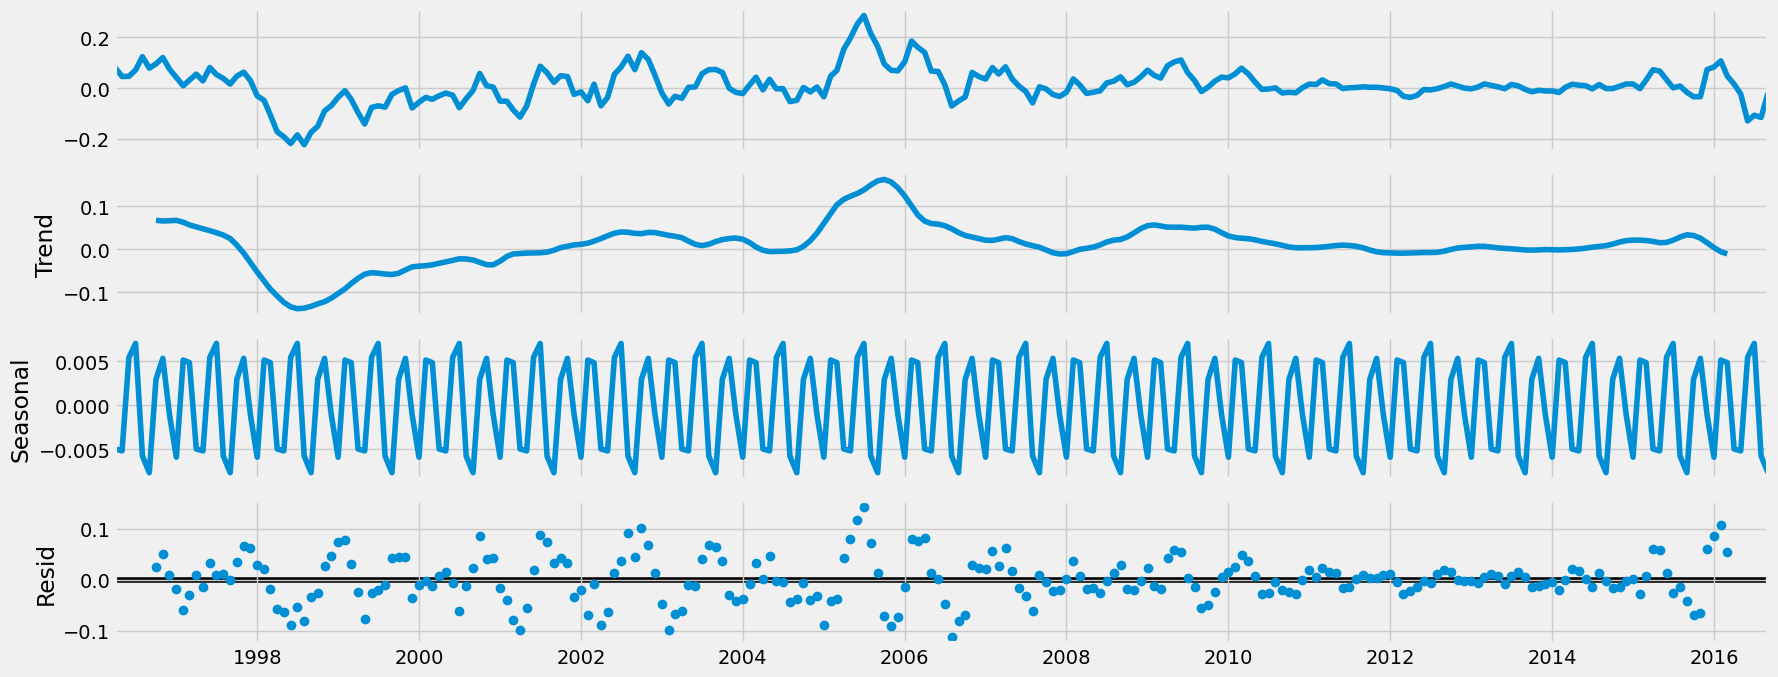

In [72]:
# Plot the separate components

decomposition_2.plot()
plt.show()

### This script contains the following:

#### 1. Defining Parameters
#### 2. Splitting the Data
#### 3. Running and Fitting the Model
#### 4. Iterating

# 1. Defining Parameters

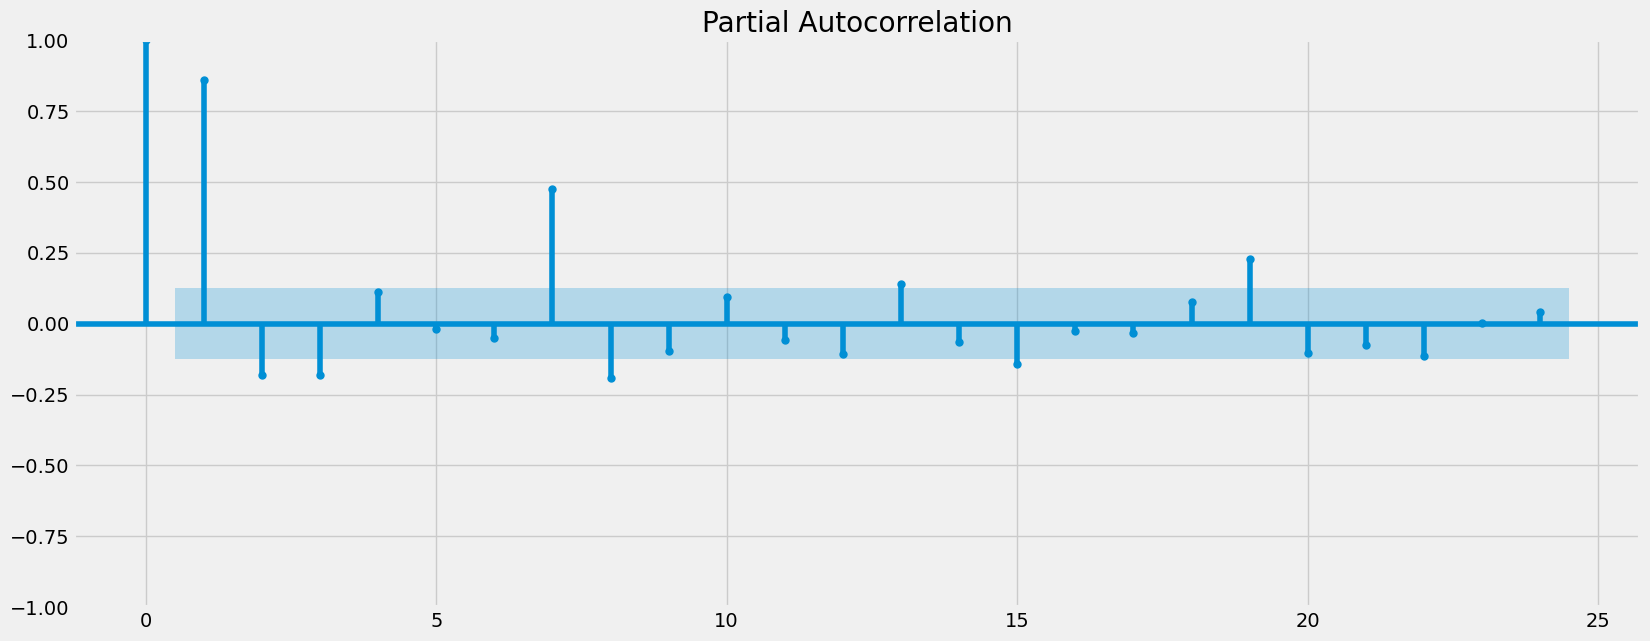

<Figure size 4500x4500 with 0 Axes>

In [82]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(data_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

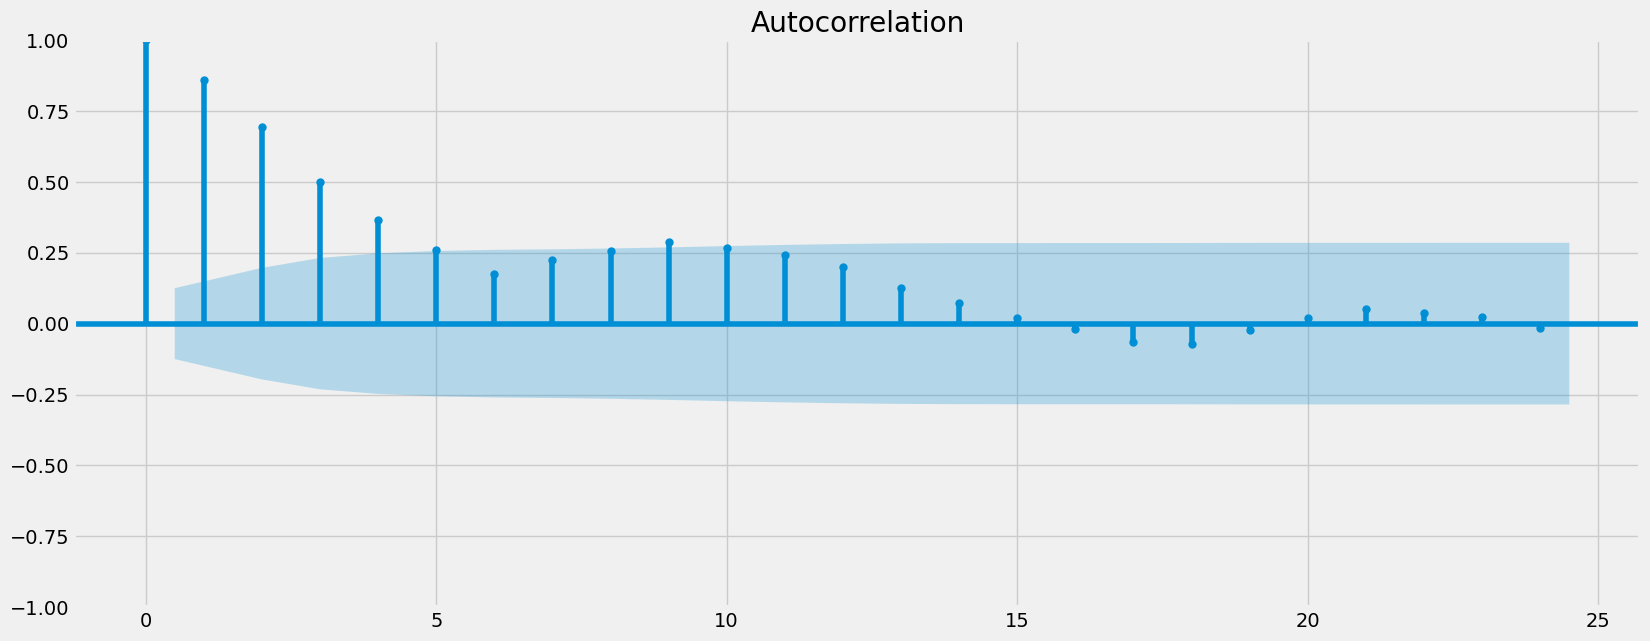

<Figure size 1500x500 with 0 Axes>

In [83]:
# Plot autocorrelations to determine parameter q

plot_acf(data_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

### 8 significant autocorrelations and partial autocorrelations are present which means that stationarity is weak.

# 2. Splitting the Data

In [84]:
data_diff.shape

(246, 1)

In [85]:
# Split the data

train = data_diff['SMA3'][:196]
test = data_diff['SMA3'][195:]

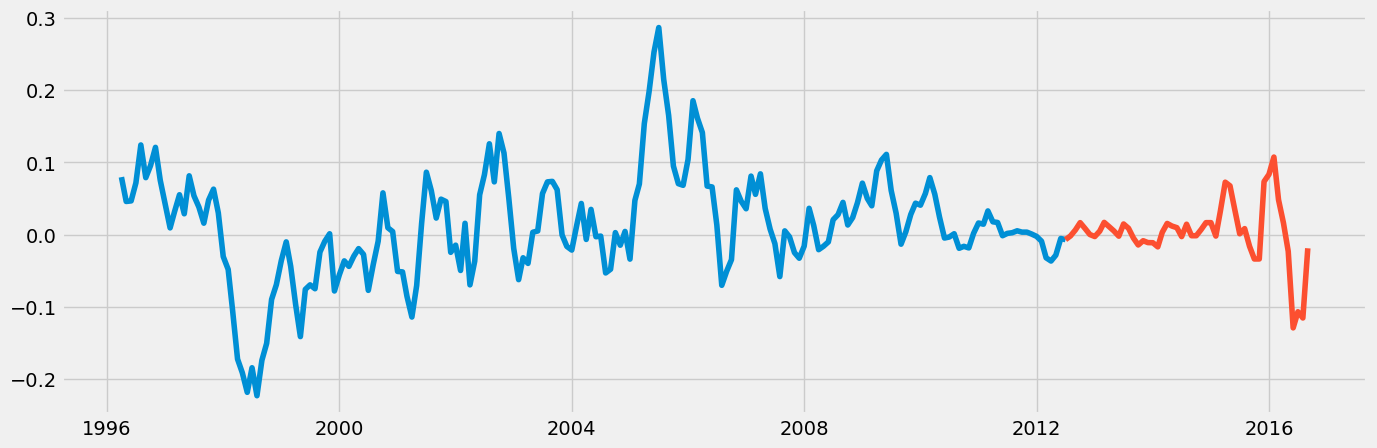

In [87]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [88]:
# test set contains ~20% of the data

test.shape

(51,)

# 3. Running and Fitting the Model

In [89]:
ar_model = AutoReg(train, lags=8).fit()

In [90]:
pred_start = test.index[0]
pred_end = test.index[-1]

In [91]:
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   SMA3   No. Observations:                  196
Model:                     AutoReg(8)   Log Likelihood                 393.424
Method:               Conditional MLE   S.D. of innovations              0.030
Date:                Fri, 01 Dec 2023   AIC                           -766.848
Time:                        18:04:32   BIC                           -734.484
Sample:                    12-01-1996   HQIC                          -753.735
                         - 07-01-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.002      0.242      0.809      -0.004       0.005
SMA3.L1        1.1548      0.071     16.261      0.000       1.016       1.294
SMA3.L2       -0.1423      0.097     -1.468      0.1

In [92]:
pred = ar_model.predict(start=pred_start, end=pred_end)
residuals = test - pred

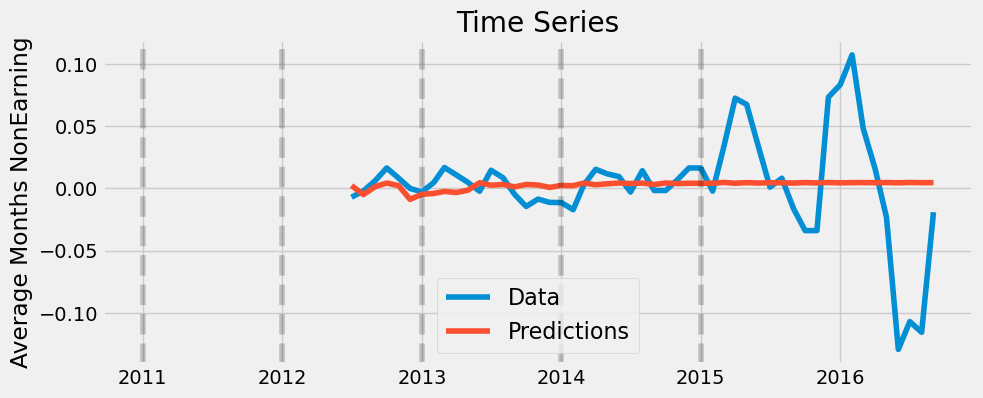

In [94]:
# Plot
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(pred)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Time Series')
plt.ylabel('Average Months NonEarning')
for year in range (2011,2016):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# 4. Iterating

                               SARIMAX Results                                
Dep. Variable:                   SMA3   No. Observations:                  196
Model:                 ARIMA(5, 1, 5)   Log Likelihood                 414.362
Date:                Fri, 01 Dec 2023   AIC                           -806.723
Time:                        18:08:42   BIC                           -770.720
Sample:                    04-01-1996   HQIC                          -792.146
                         - 07-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1255      0.154      0.816      0.415      -0.176       0.427
ar.L2          1.0052      0.128      7.850      0.000       0.754       1.256
ar.L3          0.0315      0.120      0.262      0.7

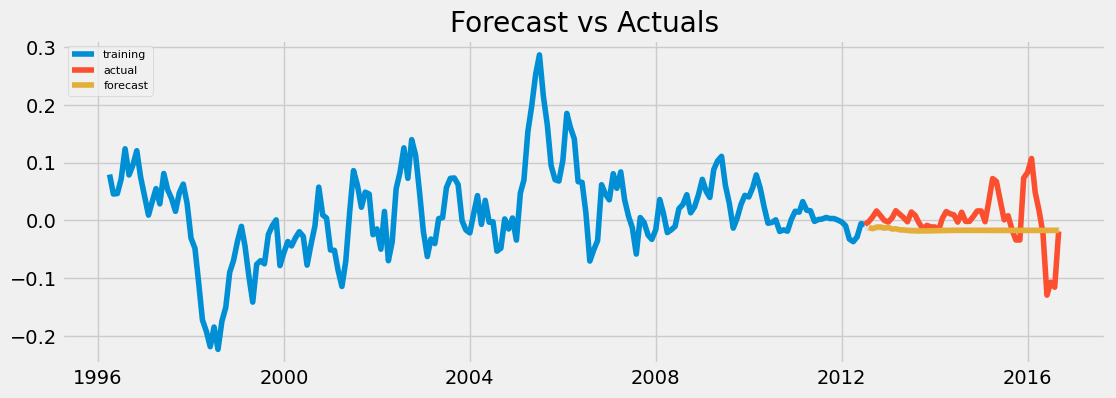

In [102]:
model = ARIMA(train, order=(5, 1, 5))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.forecast(51, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 51 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(fc[0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(fc[50], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### AR1 and MA values are significant. However, forecasted line does not fit actual. Model will not be used in this analysis.